# Transformada Discreta de Fourier (DFT) y su Inversa (IDFT)

## Introducción

La Transformada Discreta de Fourier (DFT) es una herramienta fundamental en el procesamiento digital de señales. Nos permite analizar el contenido frecuencial de una señal discreta en el tiempo, es decir, determinar qué frecuencias componen la señal y con qué amplitud y fase.

La DFT transforma una secuencia de $N$ muestras en el dominio del tiempo, $x[n]$, en una secuencia de $N$ coeficientes complejos en el dominio de la frecuencia, $X[k]$. La Transformada Discreta de Fourier Inversa (IDFT) realiza el proceso opuesto, reconstruyendo la señal original en el tiempo a partir de sus coeficientes de frecuencia.

### Definiciones Matemáticas

**DFT:** Para una secuencia de $N$ puntos $x[n]$ ($n=0, 1, \dots, N-1$), su DFT $X[k]$ ($k=0, 1, \dots, N-1$) se define como:
$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi}{N}nk}$$

**IDFT:** Para una secuencia de $N$ coeficientes de frecuencia $X[k]$, la secuencia original $x[n]$ se recupera mediante:
$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j\frac{2\pi}{N}nk}$$

Donde:
- $N$ es el número de puntos de la DFT (longitud de la señal).
- $n$ es el índice en el dominio del tiempo.
- $k$ es el índice en el dominio de la frecuencia.
- $j$ es la unidad imaginaria ($\sqrt{-1}$).

Los coeficientes $X[k]$ son, en general, números complejos. La magnitud $|X[k]|$ representa la "cantidad" de la frecuencia $k$ presente en la señal, y el ángulo $\angle X[k]$ representa la fase de dicha componente frecuencial.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración general para los gráficos
plt.rcParams['figure.figsize'] = [10, 4] # Tamaño más pequeño para mejor ajuste en notebook
plt.rcParams['figure.dpi'] = 90


def plot_signal_time_domain(t, signal, title="Señal en el Dominio del Tiempo"):
    """Grafica una señal en el dominio del tiempo."""
    plt.figure()
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def plot_dft_spectrum(freq_axis, dft_coeffs, title="Espectro de la DFT", shift_spectrum=True):
    """
    Grafica el espectro de magnitud y fase de la DFT.
    Aplica fftshift por defecto para centrar la frecuencia cero.
    """
    if shift_spectrum:
        dft_coeffs_plot = np.fft.fftshift(dft_coeffs)
        freq_axis_plot = np.fft.fftshift(freq_axis)
    else:
        dft_coeffs_plot = dft_coeffs
        freq_axis_plot = freq_axis

    magnitude_spectrum = np.abs(dft_coeffs_plot)
    phase_spectrum = np.angle(dft_coeffs_plot)
    unwrapped_phase_spectrum = np.unwrap(phase_spectrum) # Desenvolver para mejor visualización

    fig, axs = plt.subplots(2, 1, figsize=(10,6)) # Ajusta el tamaño para dos subplots

    # Espectro de Magnitud
    axs[0].plot(freq_axis_plot, magnitude_spectrum)
    axs[0].set_title(f'{title} - Magnitud')
    axs[0].set_xlabel('Frecuencia (Hz)')
    axs[0].set_ylabel('|X(k)|')
    axs[0].grid(True, linestyle='--', alpha=0.7)
    if shift_spectrum: # Mostrar hasta Nyquist si está centrado
      axs[0].set_xlim([freq_axis_plot[0], freq_axis_plot[-1]])


    # Espectro de Fase
    axs[1].plot(freq_axis_plot, unwrapped_phase_spectrum)
    axs[1].set_title(f'{title} - Fase (desenvuelta)')
    axs[1].set_xlabel('Frecuencia (Hz)')
    axs[1].set_ylabel('Fase (radianes)')
    axs[1].grid(True, linestyle='--', alpha=0.7)
    if shift_spectrum:
      axs[1].set_xlim([freq_axis_plot[0], freq_axis_plot[-1]])


    plt.tight_layout()
    plt.show()

## Implementación Manual de la DFT y la IDFT 

Para entender mejor el proceso, podemos implementar la DFT y la IDFT usando bucles. Estas implementaciones no son eficientes para señales largas, pero ilustran directamente las fórmulas.

In [8]:
def dft_manual(x_n):
    """Calcula la DFT de una señal x_n usando bucles."""
    N = len(x_n)
    X_k = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        for n in range(N):
            X_k[k] += x_n[n] * np.exp(-2j * np.pi * k * n / N)
    return X_k

def idft_manual(X_k):
    """Calcula la IDFT de coeficientes X_k usando bucles."""
    N = len(X_k)
    x_n_reconstructed = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for k in range(N):
            x_n_reconstructed[n] += X_k[k] * np.exp(2j * np.pi * k * n / N)
        x_n_reconstructed[n] /= N  # Aplicar el factor de escala 1/N
    return x_n_reconstructed

## Ejemplo 1: DFT de una Señal Sinusoidal Simple

Vamos a generar una señal sinusoidal y calcular su DFT e IDFT, tanto con las funciones manuales (si se desea probar) como con las funciones eficientes de NumPy (`np.fft`).

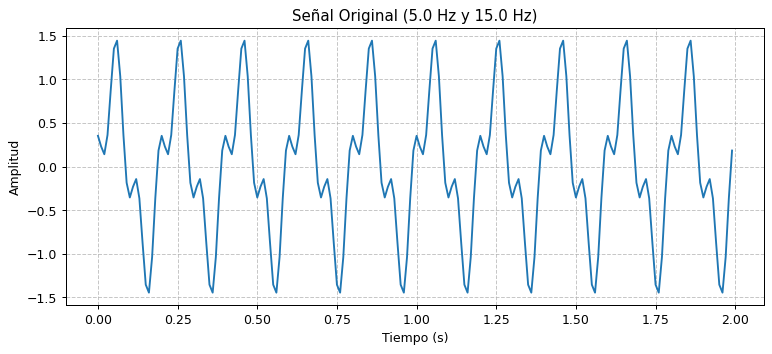

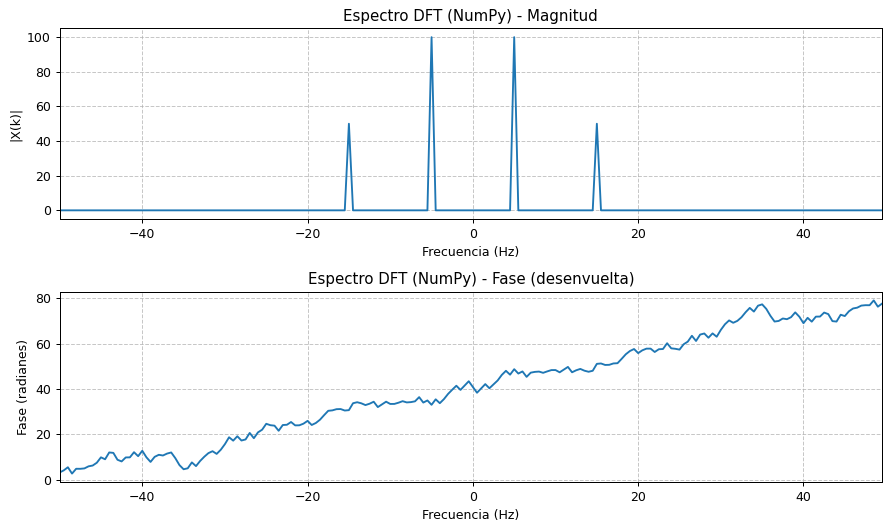

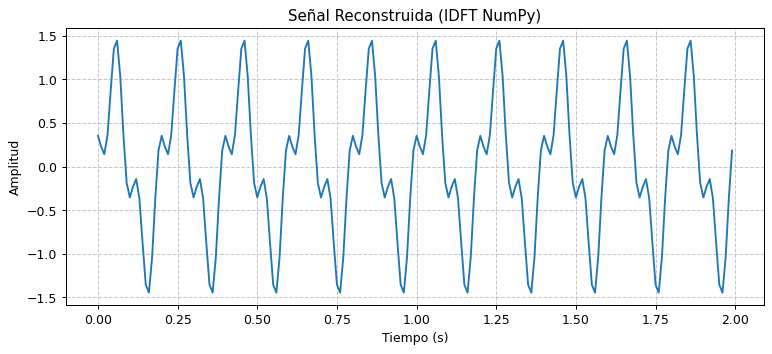

Error RMS (NumPy) entre original y reconstruida: 1.91e-16


In [9]:
# Parámetros de la señal
fs = 100.0  # Frecuencia de muestreo (Hz)
T = 2.0     # Duración de la señal (s)
N = int(fs * T) # Número total de muestras
t = np.linspace(0, T, N, endpoint=False) # Vector de tiempo (evitar endpoint=True para DFT)

# Componentes de frecuencia de la señal
f1 = 5.0    # Frecuencia de la primera sinusoide (Hz)
A1 = 1.0    # Amplitud
f2 = 15.0   # Frecuencia de la segunda sinusoide (Hz)
A2 = 0.5    # Amplitud

# Generar la señal
signal = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.cos(2 * np.pi * f2 * t + np.pi/4)

# Graficar señal original
plot_signal_time_domain(t, signal, title=f"Señal Original ({f1} Hz y {f2} Hz)")

# --- Usando NumPy (recomendado y eficiente) ---
# Calcular DFT
dft_coeffs_numpy = np.fft.fft(signal)

# Generar eje de frecuencias para la DFT
# np.fft.fftfreq genera las frecuencias en el orden que np.fft.fft las devuelve
# (positivas primero, luego negativas después de Nyquist)
frequencies_numpy = np.fft.fftfreq(N, d=1/fs)

# Graficar espectro (la función plot_dft_spectrum aplica fftshift internamente)
plot_dft_spectrum(frequencies_numpy, dft_coeffs_numpy, title="Espectro DFT (NumPy)")

# Calcular IDFT
signal_reconstructed_numpy = np.fft.ifft(dft_coeffs_numpy)

# Graficar señal reconstruida
# Es común tomar la parte real si la señal original era real, debido a pequeños errores numéricos.
plot_signal_time_domain(t, np.real_if_close(signal_reconstructed_numpy), title="Señal Reconstruida (IDFT NumPy)")

# Verificar la calidad de la reconstrucción
error_rms_numpy = np.sqrt(np.mean((signal - np.real_if_close(signal_reconstructed_numpy))**2))
print(f"Error RMS (NumPy) entre original y reconstruida: {error_rms_numpy:.2e}")
assert np.allclose(signal, np.real_if_close(signal_reconstructed_numpy)), "La reconstrucción con NumPy no fue precisa."

# --- (Opcional) Pruebas con implementación manual ---
# Descomentar las siguientes líneas para probar las funciones manuales
# ¡ADVERTENCIA: Puede ser lento para N grande!
# if N <= 256: # Solo ejecutar para N pequeño
# print("\n--- Probando implementaciones manuales (puede ser lento) ---")
#    dft_coeffs_manual = dft_manual(signal)
#    # Para graficar el espectro de la DFT manual, necesitamos el mismo eje de frecuencias
#    # y aplicar fftshift si la función de ploteo lo espera.
#    plot_dft_spectrum(frequencies_numpy, dft_coeffs_manual, title="Espectro DFT (Manual)")
#
#    signal_reconstructed_manual = idft_manual(dft_coeffs_manual)
#    plot_signal_time_domain(t, np.real_if_close(signal_reconstructed_manual), title="Señal Reconstruida (IDFT Manual)")
#
#    error_rms_manual = np.sqrt(np.mean((signal - np.real_if_close(signal_reconstructed_manual))**2))
#    print(f"Error RMS (Manual) entre original y reconstruida: {error_rms_manual:.2e}")
#
#    # Comparar DFT manual con NumPy (considerando posibles pequeñas diferencias numéricas)
#    if np.allclose(dft_coeffs_manual, dft_coeffs_numpy):
#        print("Resultados de DFT manual y NumPy son cercanos.")
#    else:
#        print("Resultados de DFT manual y NumPy DIFIEREN.")
# else:
# print(f"\nN={N} es demasiado grande para probar implementaciones manuales de DFT/IDFT en este demo.")

## Consideraciones Adicionales

### Fast Fourier Transform (FFT)
La función `np.fft.fft` de NumPy no implementa la DFT mediante la suma directa (que tiene complejidad $O(N^2)$), sino que utiliza algoritmos de **Transformada Rápida de Fourier (FFT)**. Estos algoritmos, como el de Cooley-Tukey, reducen drásticamente la complejidad computacional a $O(N \log N)$, haciendo posible el análisis de señales largas en tiempos razonables.

### `fftshift` y `fftfreq`
- `np.fft.fft(signal)` devuelve los coeficientes de la DFT en un orden específico: primero el componente DC (frecuencia cero), luego los componentes de frecuencia positiva hasta la frecuencia de Nyquist, y luego los componentes de frecuencia negativa (en orden descendente de frecuencia si se interpretan así).
- `np.fft.fftfreq(N, d=1/fs)` genera las frecuencias correspondientes a cada coeficiente $X[k]$ en el mismo orden que `fft` las devuelve.
- `np.fft.fftshift()` es una función útil para reorganizar los coeficientes de la DFT (y el eje de frecuencias correspondiente) de manera que la frecuencia cero quede en el centro del espectro, lo cual es más intuitivo para la visualización. La función `plot_dft_spectrum` que definimos anteriormente ya se encarga de esto.

### Espectro de Señales Reales
Para una señal de entrada $x[n]$ que es puramente real, su DFT $X[k]$ exhibe una **simetría hermitiana**:
$$X[k] = X^*[N-k]$$
Esto implica que la magnitud del espectro es par ($|X[k]| = |X[N-k]|$) y la fase es impar ($\angle X[k] = -\angle X[N-k]$). Por esta razón, a menudo solo se grafica la mitad del espectro (de DC hasta la frecuencia de Nyquist) para señales reales.